<a href="https://colab.research.google.com/github/FelipeOcampo03/multiclassclassification/blob/main/clasificacionmultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [5]:
(train_data, train_labels) , (test_data, test_labels) = reuters.load_data(num_words= 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

In [8]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [9]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
for _ in train_data[0]:
    print(word_index.get(_ - 3))

In [11]:
train_labels[0]

3

In [12]:
train_data.shape #No es tipo tensor

(8982,)

In [14]:
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [15]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [18]:
from keras.utils import to_categorical

In [19]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [20]:
y_train[0] #Estructura de tensor

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [40]:
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape= (10000, )))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [41]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
x_val= x_train[:1000]
partial_x_train= x_train[1000:]
y_val= y_train[:1000]
partial_y_train= y_train[1000:]

In [43]:
history= model.fit(partial_x_train, partial_y_train, epochs= 9, batch_size= 512, validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 35ms/step - loss: 2.7053 - accuracy: 0.4747 - val_loss: 1.8489 - val_accuracy: 0.6170
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.5510 - accuracy: 0.6809 - val_loss: 1.3903 - val_accuracy: 0.6860
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1961 - accuracy: 0.7379 - val_loss: 1.2257 - val_accuracy: 0.7430
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.9809 - accuracy: 0.7876 - val_loss: 1.0908 - val_accuracy: 0.7570
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8204 - accuracy: 0.8177 - val_loss: 1.0232 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6866 - accuracy: 0.8492 - val_loss: 0.9855 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5728 - accuracy: 0.8761 - val_loss: 0.9229 - val_accuracy: 0.8010
Epoch 8/9
16/16 [===

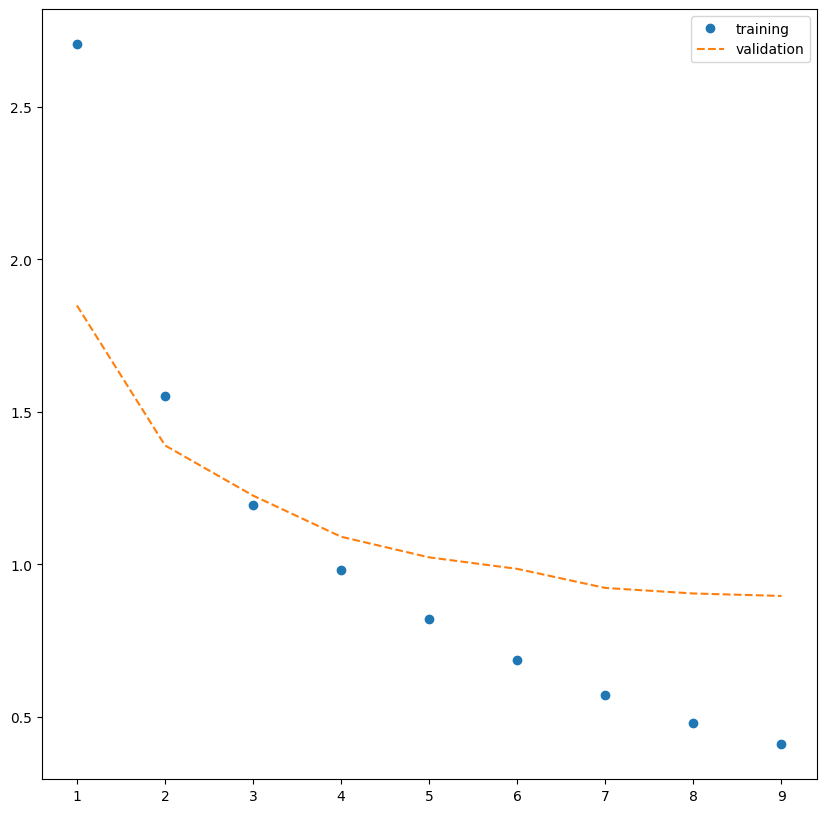

In [44]:
import matplotlib.pyplot as plt

history_dict= history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']

fig= plt.figure(figsize= (10,10))
epoch= range(1,len(loss_values)+1)
plt.plot(epoch, loss_values,'o', label= 'training')
plt.plot(epoch, val_loss_values,'--', label= 'validation')
plt.legend()
plt.show()

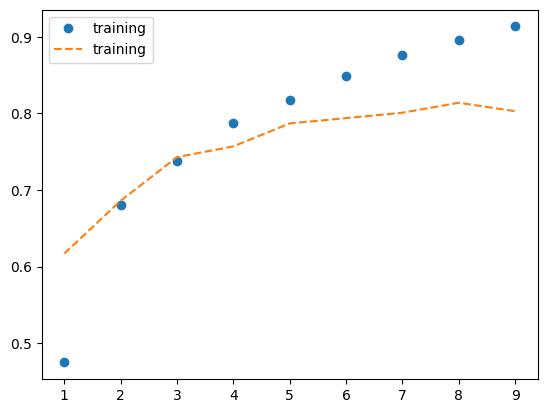

In [45]:
import matplotlib.pyplot as plt

history_dict= history.history
loss_values= history_dict['accuracy']
val_loss_values= history_dict['val_accuracy']
epoch= range(1,len(loss_values)+1)
plt.plot(epoch, loss_values,'o', label= 'training')
plt.plot(epoch, val_loss_values,'--', label= 'training')
plt.legend()
plt.show()

In [36]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1467 - accuracy: 0.7890


[1.1467199325561523, 0.7889581322669983]

In [46]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9778 - accuracy: 0.7778


[0.9777745008468628, 0.777827262878418]

In [49]:
predictions= model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [50]:
predictions[0]

array([2.0787631e-05, 1.2324958e-05, 7.7762161e-07, 7.3044044e-01,
       2.6454473e-01, 1.8608845e-06, 1.5940140e-04, 3.3483131e-05,
       1.4409798e-03, 2.7220061e-05, 3.5857673e-05, 1.2527534e-04,
       7.2707617e-06, 4.3959409e-04, 2.3168084e-05, 1.1455774e-05,
       2.6260506e-04, 5.8160548e-04, 9.8799301e-06, 2.4822861e-04,
       1.6918486e-04, 1.5166444e-04, 1.0594106e-06, 2.9543802e-04,
       4.7211511e-06, 4.4137330e-05, 1.5324724e-05, 4.2207830e-06,
       1.1058769e-04, 1.5770049e-04, 7.6388103e-05, 2.1684078e-05,
       5.1295996e-05, 5.9548579e-06, 9.6179720e-05, 1.2646939e-06,
       2.8121023e-05, 2.8645949e-05, 2.4174933e-05, 1.9003946e-04,
       1.1616341e-05, 6.5779990e-05, 1.0044744e-06, 1.1825858e-05,
       2.3556852e-06, 2.6577834e-06], dtype=float32)

In [51]:
np.sum(predictions[0])

1.0000001

In [52]:
np.argmax(predictions[0])

3

In [53]:
model = models.Sequential()
model.add(layers.Dense(65, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(65, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']
             )

x_val2 = x_train[:1000]
partial_x_train2 = x_train[1000:]

y_val2 = y_train[:1000]
partial_y_train2 =  y_train[1000:]

history2 = model.fit(partial_x_train2,
                   partial_y_train2,
                   epochs=25,
                   batch_size=512,
                   validation_data=(x_val2,y_val2))

Epoch 1/25
16/16 [==============================] - 2s 37ms/step - loss: 3.1522 - acc: 0.3009 - val_loss: 2.2763 - val_acc: 0.5410
Epoch 2/25
16/16 [==============================] - 0s 20ms/step - loss: 2.1854 - acc: 0.4961 - val_loss: 1.6992 - val_acc: 0.5920
Epoch 3/25
16/16 [==============================] - 0s 17ms/step - loss: 1.8358 - acc: 0.5576 - val_loss: 1.5340 - val_acc: 0.6340
Epoch 4/25
16/16 [==============================] - 0s 21ms/step - loss: 1.6703 - acc: 0.5891 - val_loss: 1.4073 - val_acc: 0.6750
Epoch 5/25
16/16 [==============================] - 0s 18ms/step - loss: 1.5533 - acc: 0.6186 - val_loss: 1.3307 - val_acc: 0.6990
Epoch 6/25
16/16 [==============================] - 0s 17ms/step - loss: 1.4737 - acc: 0.6383 - val_loss: 1.2824 - val_acc: 0.7080
Epoch 7/25
16/16 [==============================] - 0s 18ms/step - loss: 1.3883 - acc: 0.6594 - val_loss: 1.2270 - val_acc: 0.7140
Epoch 8/25
16/16 [==============================] - 0s 18ms/step - loss: 1.3419 - a